In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

a) Read and load the data

In [4]:
college = pd.read_csv('/Users/jason/documents/UMKC/Fall_2018/Statistical_Learning/Lab1/College.csv')
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


b) Set college as the identifier variable

In [5]:
cols = list(college.columns)
cols[0] = 'College'
college.columns = cols
college.set_index('College', inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


c) i. Get a numerical summary of the data

In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


ii. Scatterplot matrix of first ten columns of data

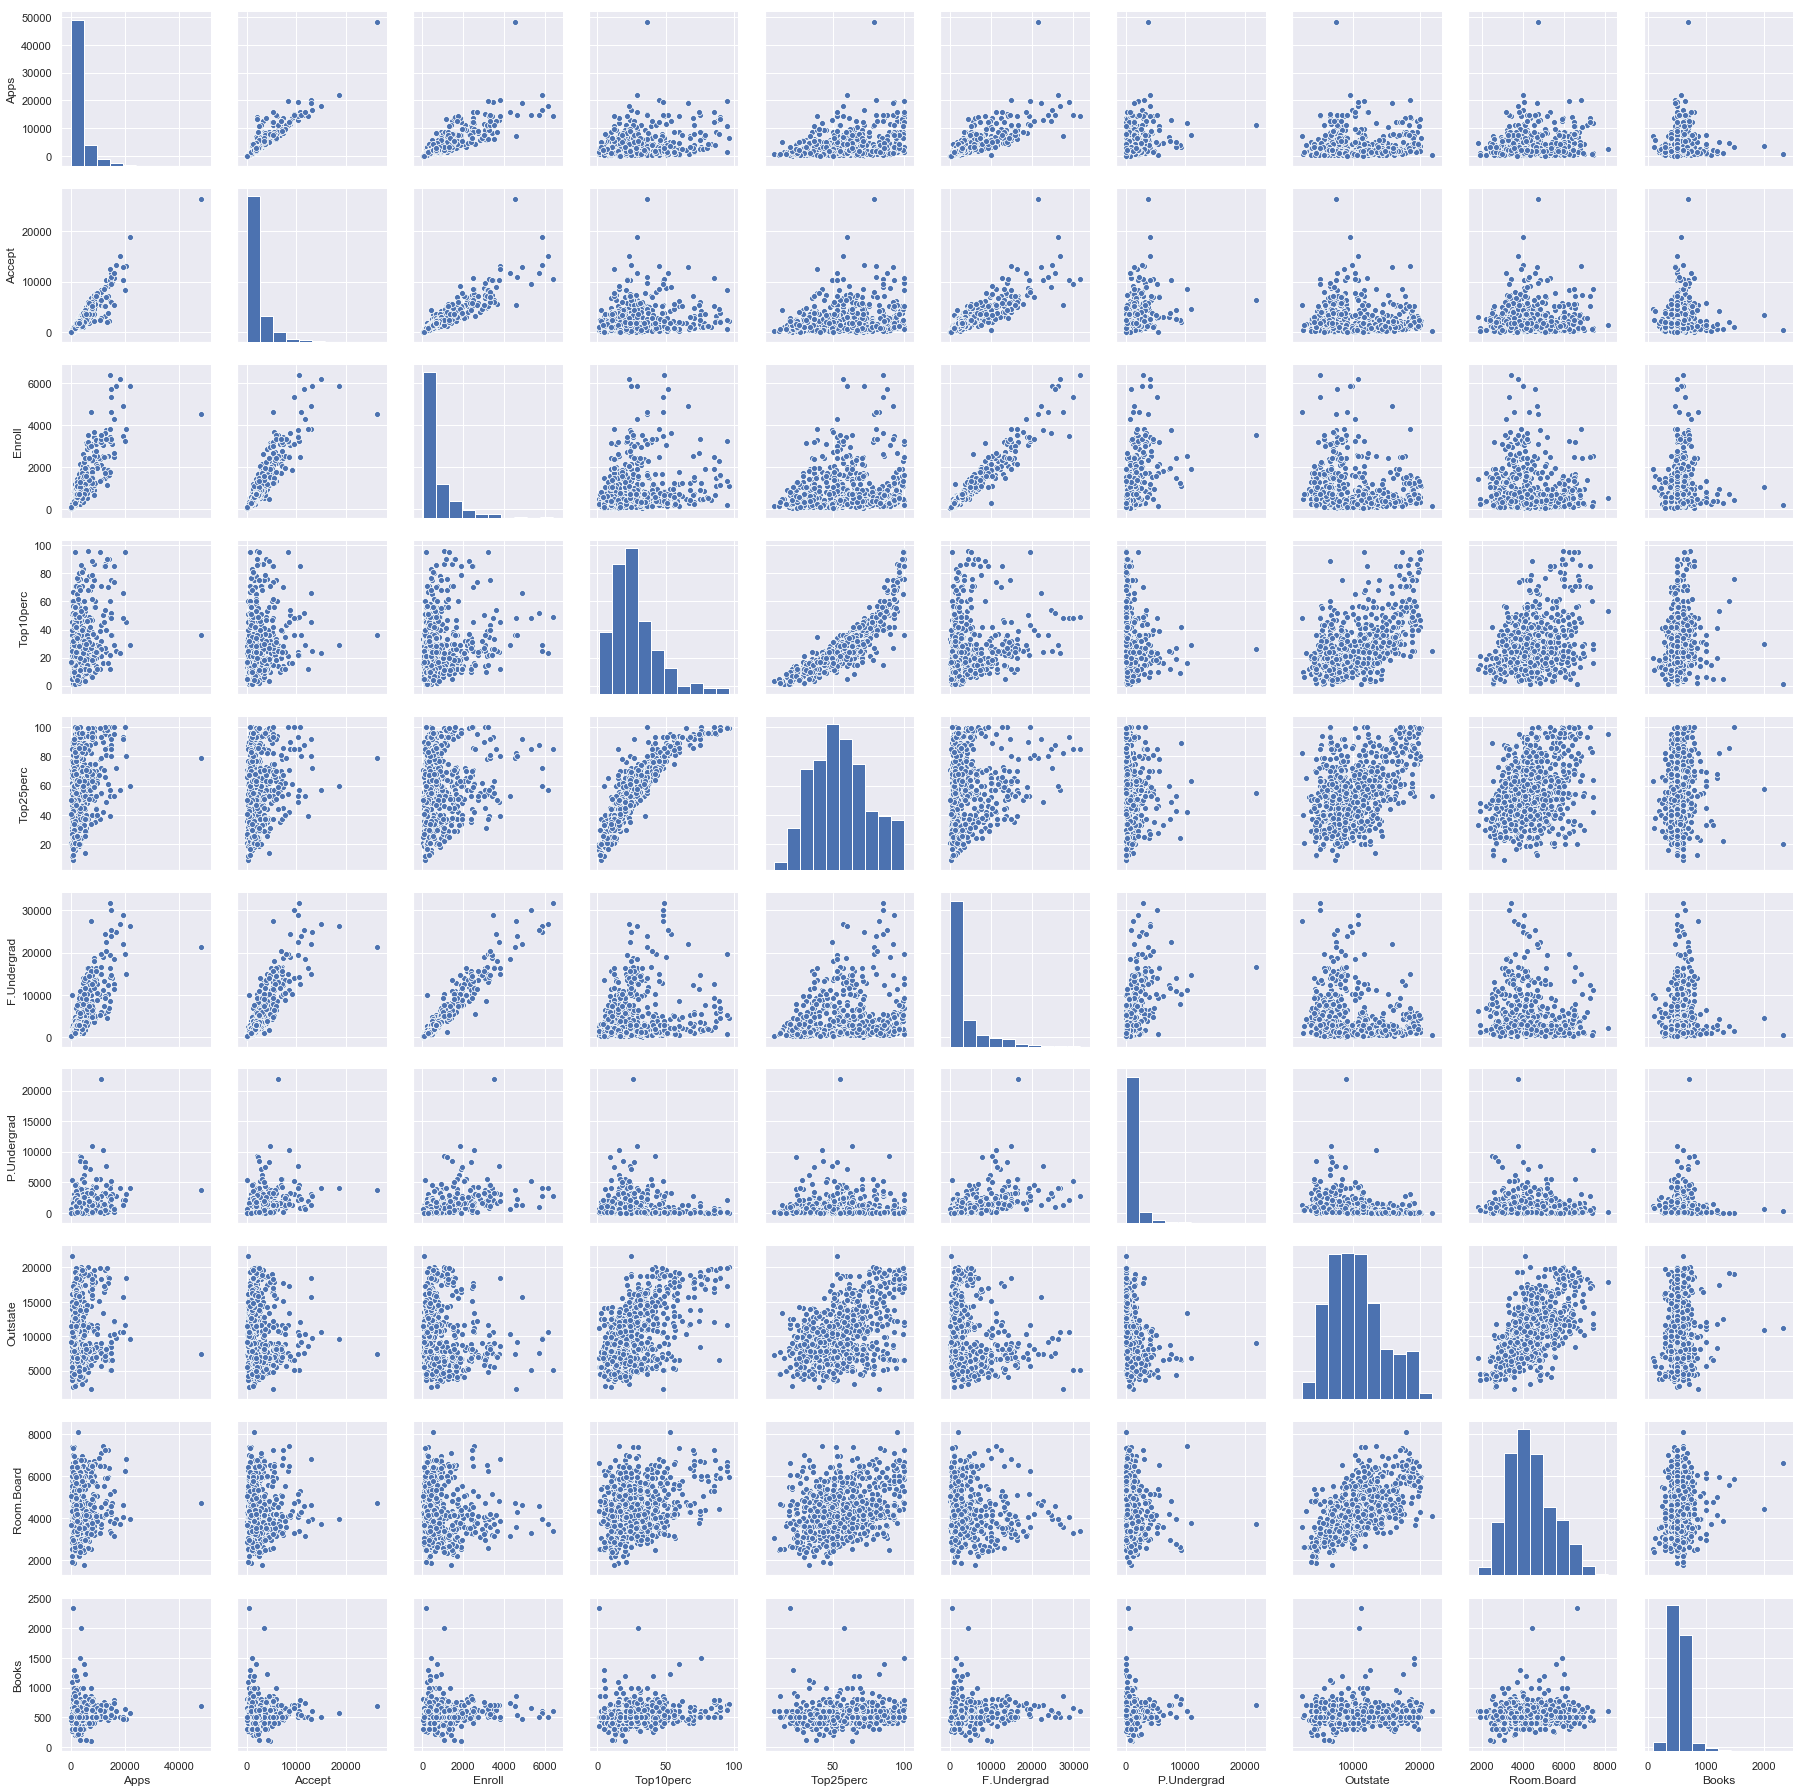

In [7]:
sns.pairplot(college[college.columns[:11]])

iii. side-by-side boxplots of Outstate versus Private

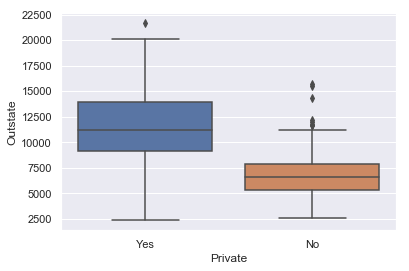

In [11]:
sns.boxplot(x="Private", y="Outstate", data=college)

iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable. We are going to divide universitiesinto two groups based on whether or not the proportionof students coming from the top 10% of their high school classes exceeds 50%

In [12]:
college['Elite'] = college['Top10perc'] > 50
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False


See how many elite universities there are

In [13]:
college['Elite'].describe() = 777 - 699 = 78

count       777
unique        2
top       False
freq        699
Name: Elite, dtype: object

Produce side-by-side boxplots of Outstate versus Elite.

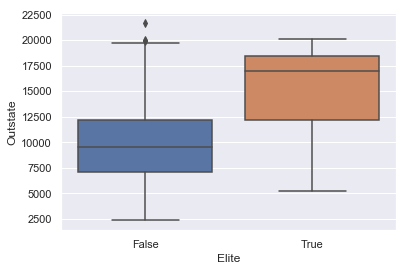

In [14]:
sns.boxplot(x="Elite", y="Outstate", data=college)

V. Produce some histograms with differing numbers of bins for a few of the quantitative variables. 

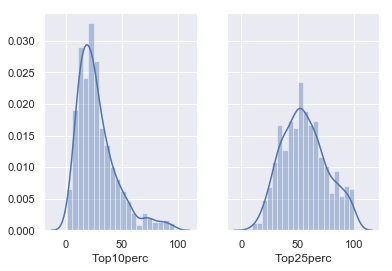

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(college['Top10perc'], ax=ax1, bins=20);
sns.distplot(college['Top25perc'], ax=ax2, bins=20);

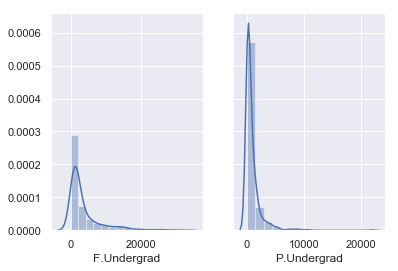

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(college['F.Undergrad'], ax=ax1, bins=15);
sns.distplot(college['P.Undergrad'], ax=ax2, bins=15);

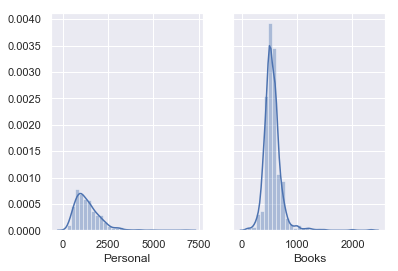

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(college['Personal'], ax=ax1, bins=30);
sns.distplot(college['Books'], ax=ax2, bins=30);

Continue exploring the data, and provide a brief summary of what you discover.

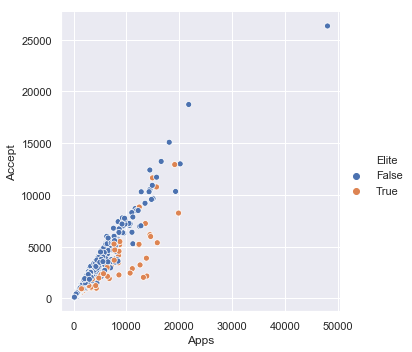

In [23]:
sns.relplot(x="Apps", y="Accept", hue="Elite", data=college);

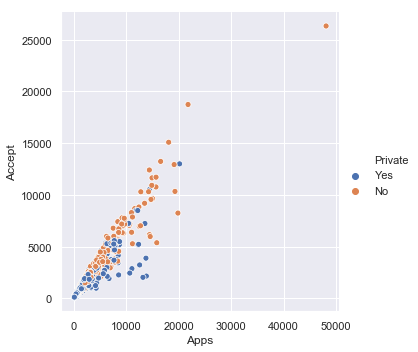

In [24]:
sns.relplot(x="Apps", y="Accept", hue="Private", data=college);

Scatter plots for number of accepted students by number of applications comparing elite and private schools. Significance would have to be tested but it appears that the elite and private schools number of accepted applications does not increase as rapidly as the number of applications increases compared to non-elite/private schools. 

2. 

In [27]:
auto = pd.read_csv('/Users/jason/documents/UMKC/Fall_2018/Statistical_Learning/Lab1/Auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [28]:
auto.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


(a) Which of the predictors are quantitative, and which are qualitative?

In [29]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


MPG, cylinders, displacement, horespower, weight, acceleration are quantitative predictors
Year(ordinal data) and Origin are qualitative

b) What is the range of each quantitative predictor? 
c) What is the mean and standard deviation of each quantitative predictor?

In [30]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Range(mpg) = 46.6 - 9 = 37.6
Range(cylinders) = 8 - 3 = 5
Range(displacement) = 455 - 68 = 387
Range(weight) = 5140 - 1613 = 3527
Range(acceleration) = 24.8 - 8 = 16.8

d) Now remove the 10th through 85th observations.What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [31]:
auto_partial = auto.drop(auto.index[[i for i in range(10, 86)]])
auto_partial.shape, auto.shape

((321, 9), (397, 9))

In [32]:
auto_partial.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.444860,5.370717,187.174455,2933.183801,15.709034,77.143302,1.598131
std,7.899928,1.653486,99.864568,809.638650,2.706441,3.128202,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


Range(mpg) = 46.6 - 11 = 35.6
Range(cylinders) = 8 - 3 = 5
Range(displacement) = 455 - 68 = 387
Range(weight) = 4997 - 1649 = 3348
Range(acceleration) = 24.8 - 8.5 = 16.3

e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools ofyour choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

In [34]:
cm = auto.corr()
cm

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


Correlation matrix shows predictors mpg, cylinders, dispacement, weight, and acceleration are correlated with at least one other variable

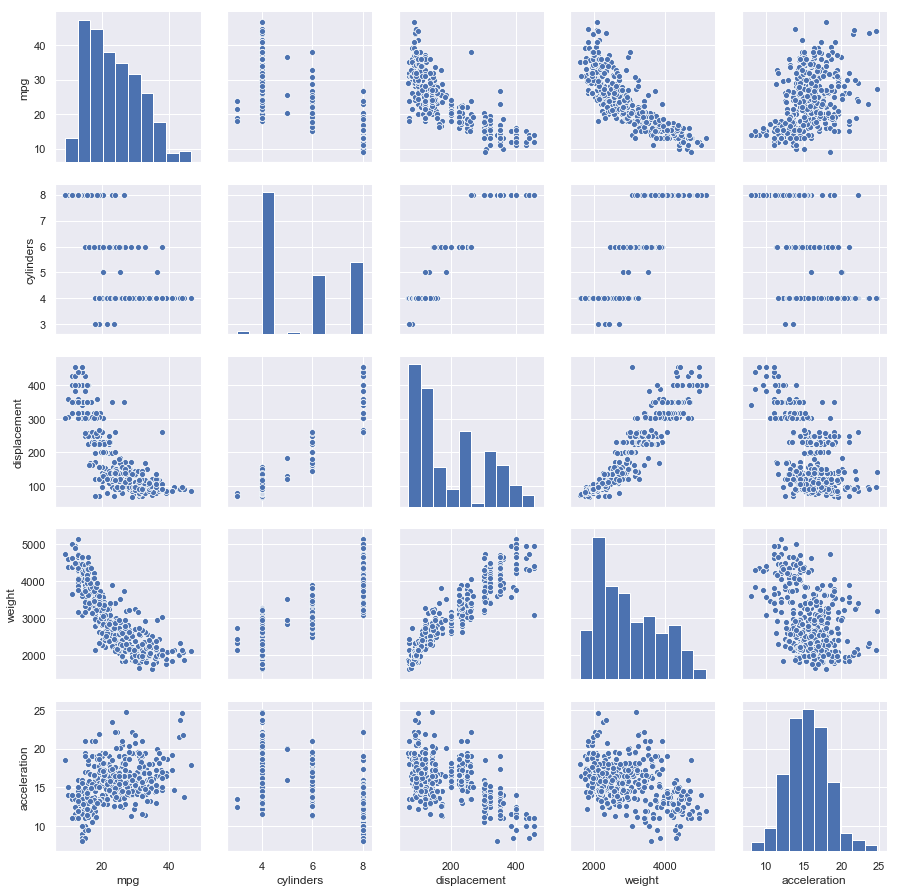

In [38]:
INTEREST_COLUMNS = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']
auto_interest = auto[INTEREST_COLUMNS]
sns.pairplot(auto_interest)

Here we can see that displacement and weight are showing a near linear relationship, while displacement and weight are also approaching linearity with mpg

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


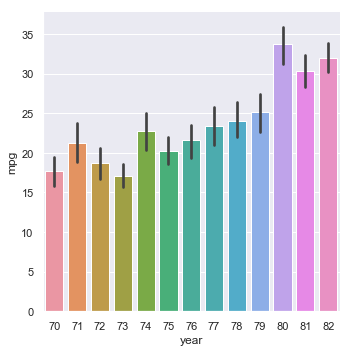

In [39]:
sns.catplot(x="year", y="mpg", kind="bar", data=auto);

Expanding on the previous comment... yes, displacement and weight both appear to be good predictors of mpg. It also appears that year may have some influence on mpg

3. (a) To begin, load in the Boston data set.
How many rows are in this data set? How many columns? What do the rows and columns represent?

In [78]:
boston = pd.read_csv('/Users/jason/documents/UMKC/Fall_2018/Statistical_Learning/Lab1/Bostondata.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

Variable information found using R ?Boston

Import added an extra column, fixing that here

In [86]:
fixed_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
boston_fixed = boston[fixed_columns]

In [87]:
boston_fixed.shape

(506, 14)

There are 506 rows representing different data points for boston suburbs and 14 columns representing predictor values.

b) Make some pairwise scatterplotsof the predictors (columns) in this data set. Describe your findings.

In [88]:
cols = list(boston_fixed.columns)
size = len(cols)
first_half, last_half = cols[:size // 2], cols[size // 2:]

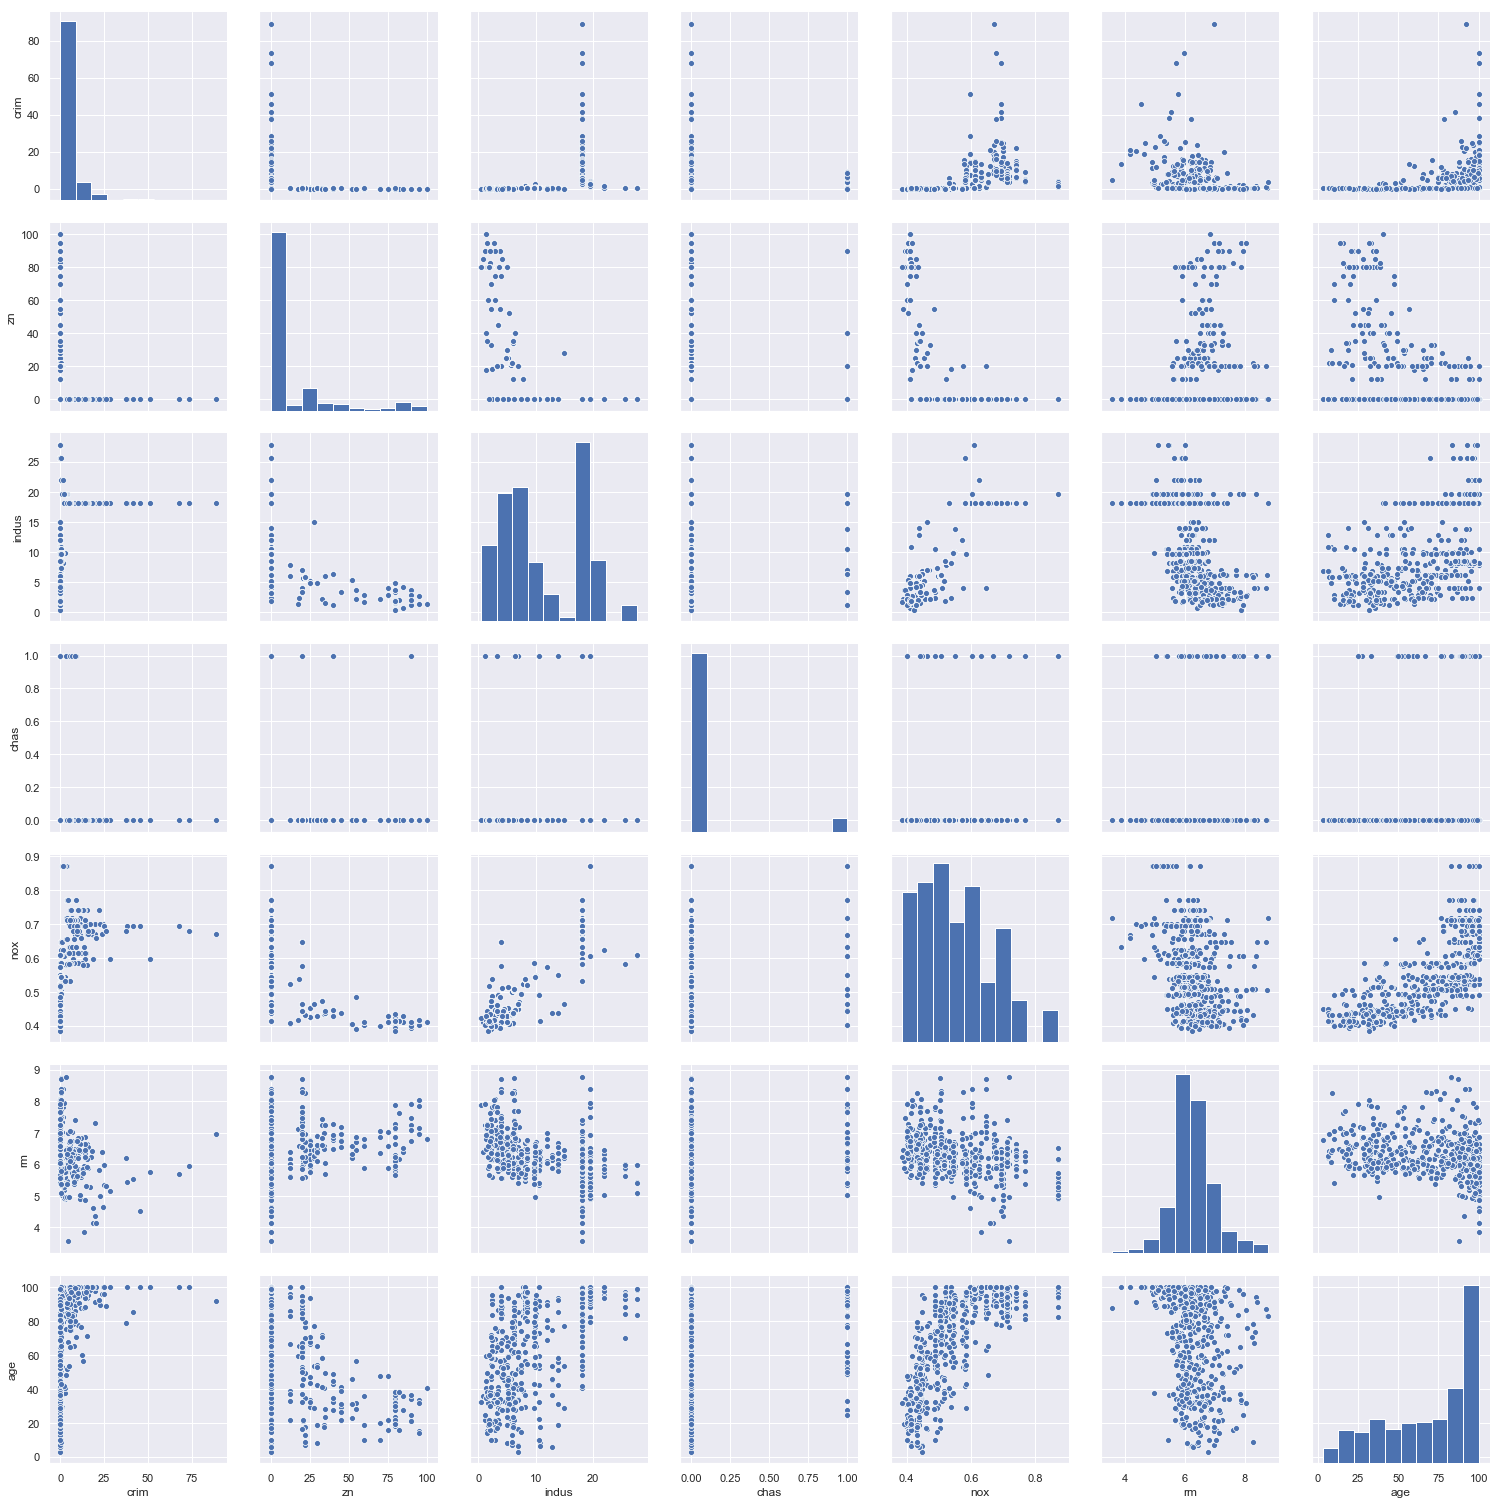

In [89]:
sns.pairplot(boston_fixed[first_half], height=3)
plt.show()

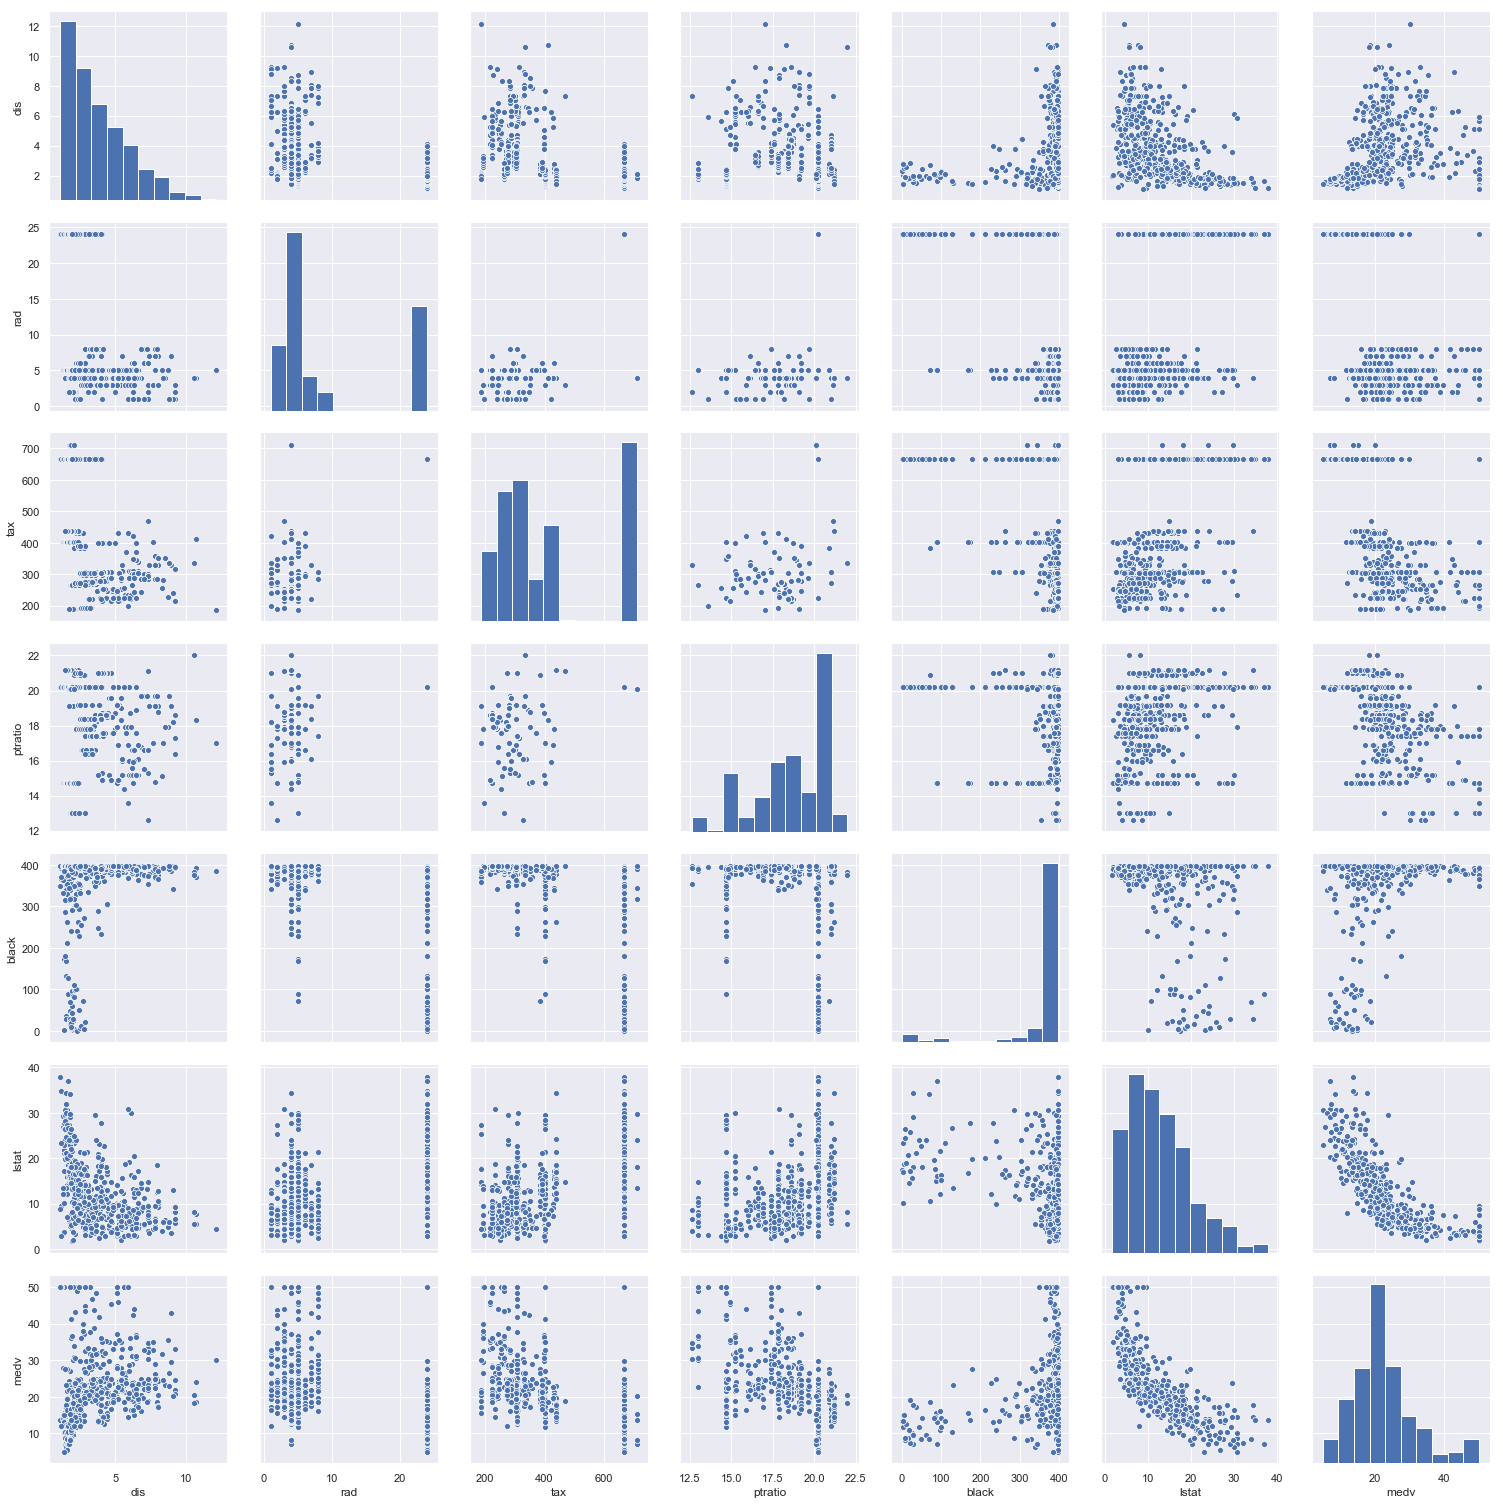

In [90]:
sns.pairplot(boston_fixed[last_half], height=3)
plt.show()

From a preliminary observation of the scatter plots the only relationship that sticks out is a near linear relationship between medv and lsat.

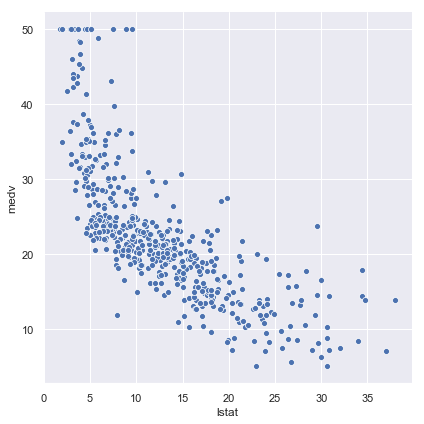

In [95]:
sns.relplot(x="lstat", y="medv", data=boston_fixed, height=6)
plt.show()

c) Are any of the predictors associated with per capita crime rate?If so, explain the relationship.

In [99]:
cm = boston_fixed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

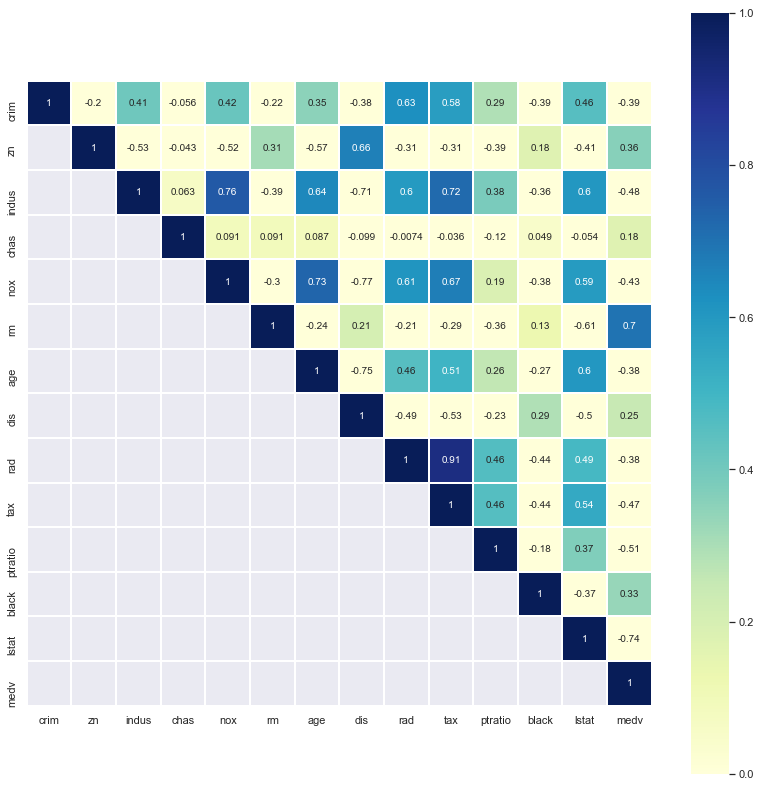

In [100]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=1, cmap='YlGnBu', square=True)
plt.show()

Using a correlation coefficient of -0.3 and 0.3+ to represent weak negative and positive relationships, respectively. We can see that proportion of residential land zoned for lots over 25,000 sq.ft, proportion of owner-occupied units built prior to 1940, index of accessibility to radial highways, ull-value property-tax rate per \$10,000, and lower status of the population (percent) are all positively correlated with per capita crime rate. While weighted mean of distances to five Boston employment centres, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, median value of owner-occupied homes in \$1000s are negatively correlated.

(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment onthe range of each predictor.

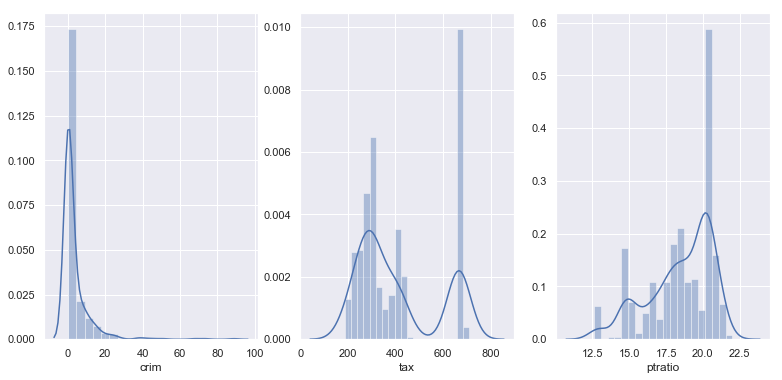

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 6))

sns.distplot(boston_fixed['crim'], bins=20, ax=ax1)
sns.distplot(boston_fixed['tax'], bins=20, ax=ax2)
sns.distplot(boston_fixed['ptratio'], bins=20, ax=ax3)
plt.show()


It appears that the majority of boston suburbs have relatively low crime rates with this rate exponentially declining with just a few spots of higher crime rates. Tax rates appear to be bimodal, with the majority of suburbs in the lower half of the distribution and then a strong peak in the upper half of the distribution. The pupil-teacher ratio appears to be close to normally distributed with a negative skew and a large peak near 20.

(e) How many of the suburbs in this data set bound the Charles river

In [102]:
boston_fixed.groupby('chas')['chas'].count()

chas
0    471
1     35
Name: chas, dtype: int64

There are 35 suburbs that bound the Charles river

(f)What is the median pupil-teacher ratio among the towns in this data set?

In [103]:
boston_fixed['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

19.05

g) Which suburb of Boston has lowest median value of owneroccupied homes? What are thevalues of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [104]:
boston_fixed[boston_fixed['medv'] == min(boston_fixed['medv'])]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [105]:
boston_fixed.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


crim is above 75th percentile, zn is min, indus is 75th pecentile, chas is min, nox is above 75th, rm is below 25th, age is max, dis is below 25th, rad is max, tax is 75th, ptratio is 75th, black is in between 25th and 50th for 405 and 75th for 398, and lsat is above 75th.

(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? Morethan eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [106]:
boston_fixed[boston_fixed['rm'] > 7].shape

(64, 14)

In [107]:
boston_fixed[boston_fixed['rm'] > 8].shape

(13, 14)

In [109]:
boston_fixed[boston_fixed['rm'] > 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


Comparing the data for these 13 suburbs with the whole data set it appears that median crime is higher, although the mean is lower. Tax is lower in both mean and median. Retail also appears to be down in these suburbs. Age of the homes seems to be slightly higher, especially regarding the 25th percentile. Accesibility to highways appears to be lower. While lower status of population is lower and median value of homes is higher. This appears to be more of an older, residential collection of Boston suburbs. 